# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = ''
full_name = "Mohammad Mowlavi"
assert student_number and full_name is not None, 'pls input your information'

# Introduction

In this assignment, you will implement PCA and try to interpret it.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [5]:
#TODO
path = '/content/drive/MyDrive/nutrition.csv'
df = pd.read_csv(path)
df.set_index('ID', inplace=True)
df.head()

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FoodGroup         8618 non-null   object 
 1   ShortDescrip      8618 non-null   object 
 2   Descrip           8618 non-null   object 
 3   CommonName        1063 non-null   object 
 4   MfgName           1560 non-null   object 
 5   ScientificName    732 non-null    object 
 6   Energy_kcal       8618 non-null   float64
 7   Protein_g         8618 non-null   float64
 8   Fat_g             8618 non-null   float64
 9   Carb_g            8618 non-null   float64
 10  Sugar_g           8618 non-null   float64
 11  Fiber_g           8618 non-null   float64
 12  VitA_mcg          8618 non-null   float64
 13  VitB6_mg          8618 non-null   float64
 14  VitB12_mcg        8618 non-null   float64
 15  VitC_mg           8618 non-null   float64
 16  VitE_mg           8618 non-null   float64
 

Exclude the non-numeric features (you will need these features later in the notebook).

In [7]:
#TODO
non_numeric_features = df.select_dtypes(exclude=['number']).columns
df_non_numeric = df[non_numeric_features]
df_numeric = df.drop(columns=non_numeric_features)
df_numeric.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

In [8]:
new_df_numeric = df_numeric.drop(df_numeric.columns[[i for i in range(7)]], axis=1)
new_df_numeric

,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83110,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
90240,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
90480,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273


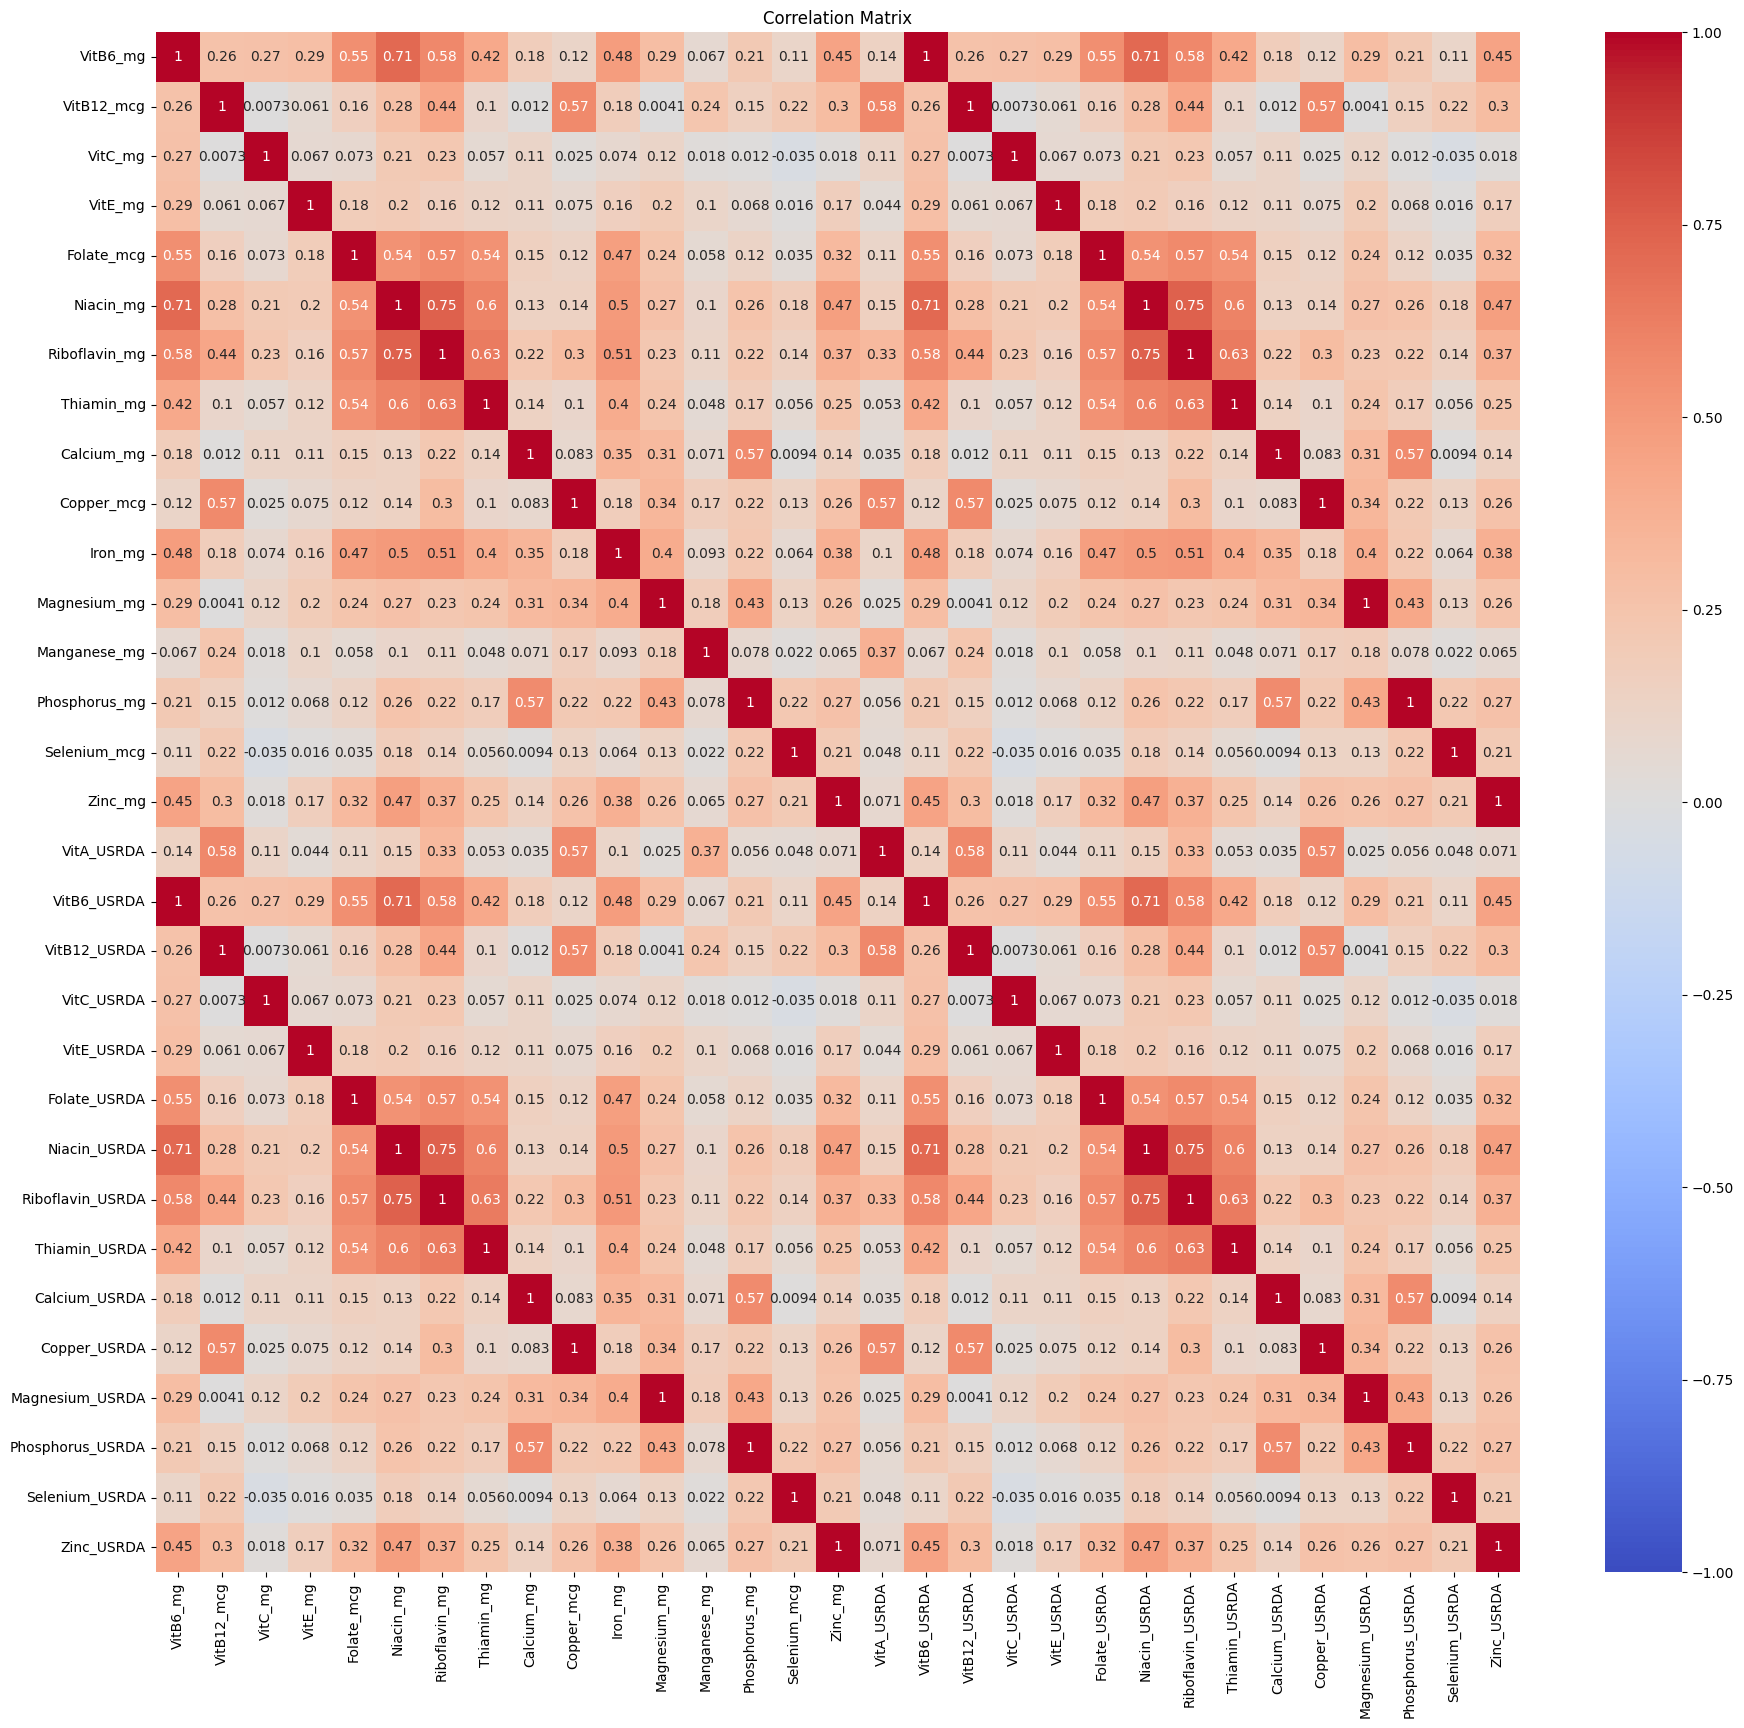

In [9]:
#TODO
correlation_matrix = new_df_numeric.corr()

plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             colname = correlation_matrix.columns[i]
#             redundant_features.add(colname)

# print("Redundant features based on correlation:")
# print(redundant_features)

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

Redundant features based on correlation:
{'Niacin_USRDA', 'Phosphorus_USRDA', 'Magnesium_USRDA', 'Copper_USRDA', 'Zinc_USRDA', 'VitB6_USRDA', 'Folate_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'Riboflavin_USRDA', 'VitE_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Selenium_USRDA'}


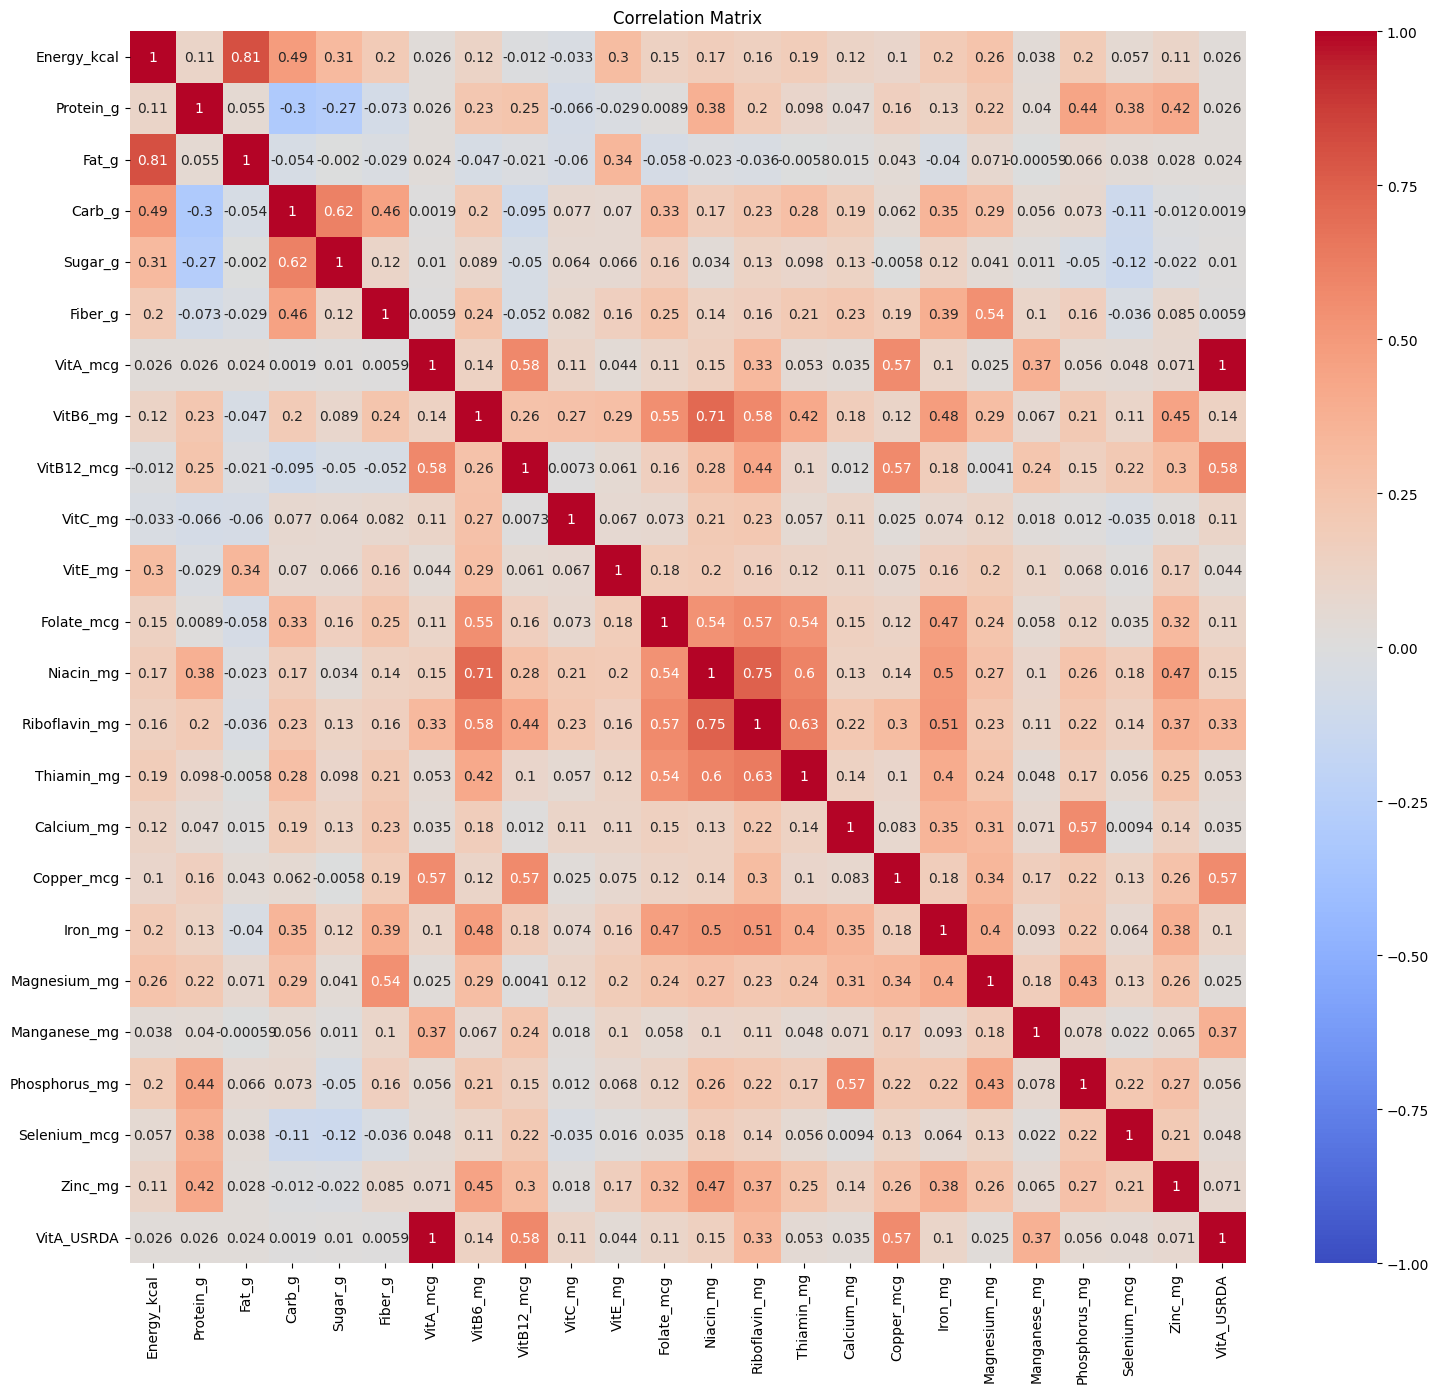

24


In [10]:
#TODO
threshold = 0.9
redundant_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            redundant_features.add(colname)
print("Redundant features based on correlation:")
print(redundant_features)
df_numeric_reduced = df_numeric.drop(columns=redundant_features)
correlation_matrix_reduced = df_numeric_reduced.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


print(len(correlation_matrix_reduced))

Explore the dataset by plotting the distribution of each feature separately.

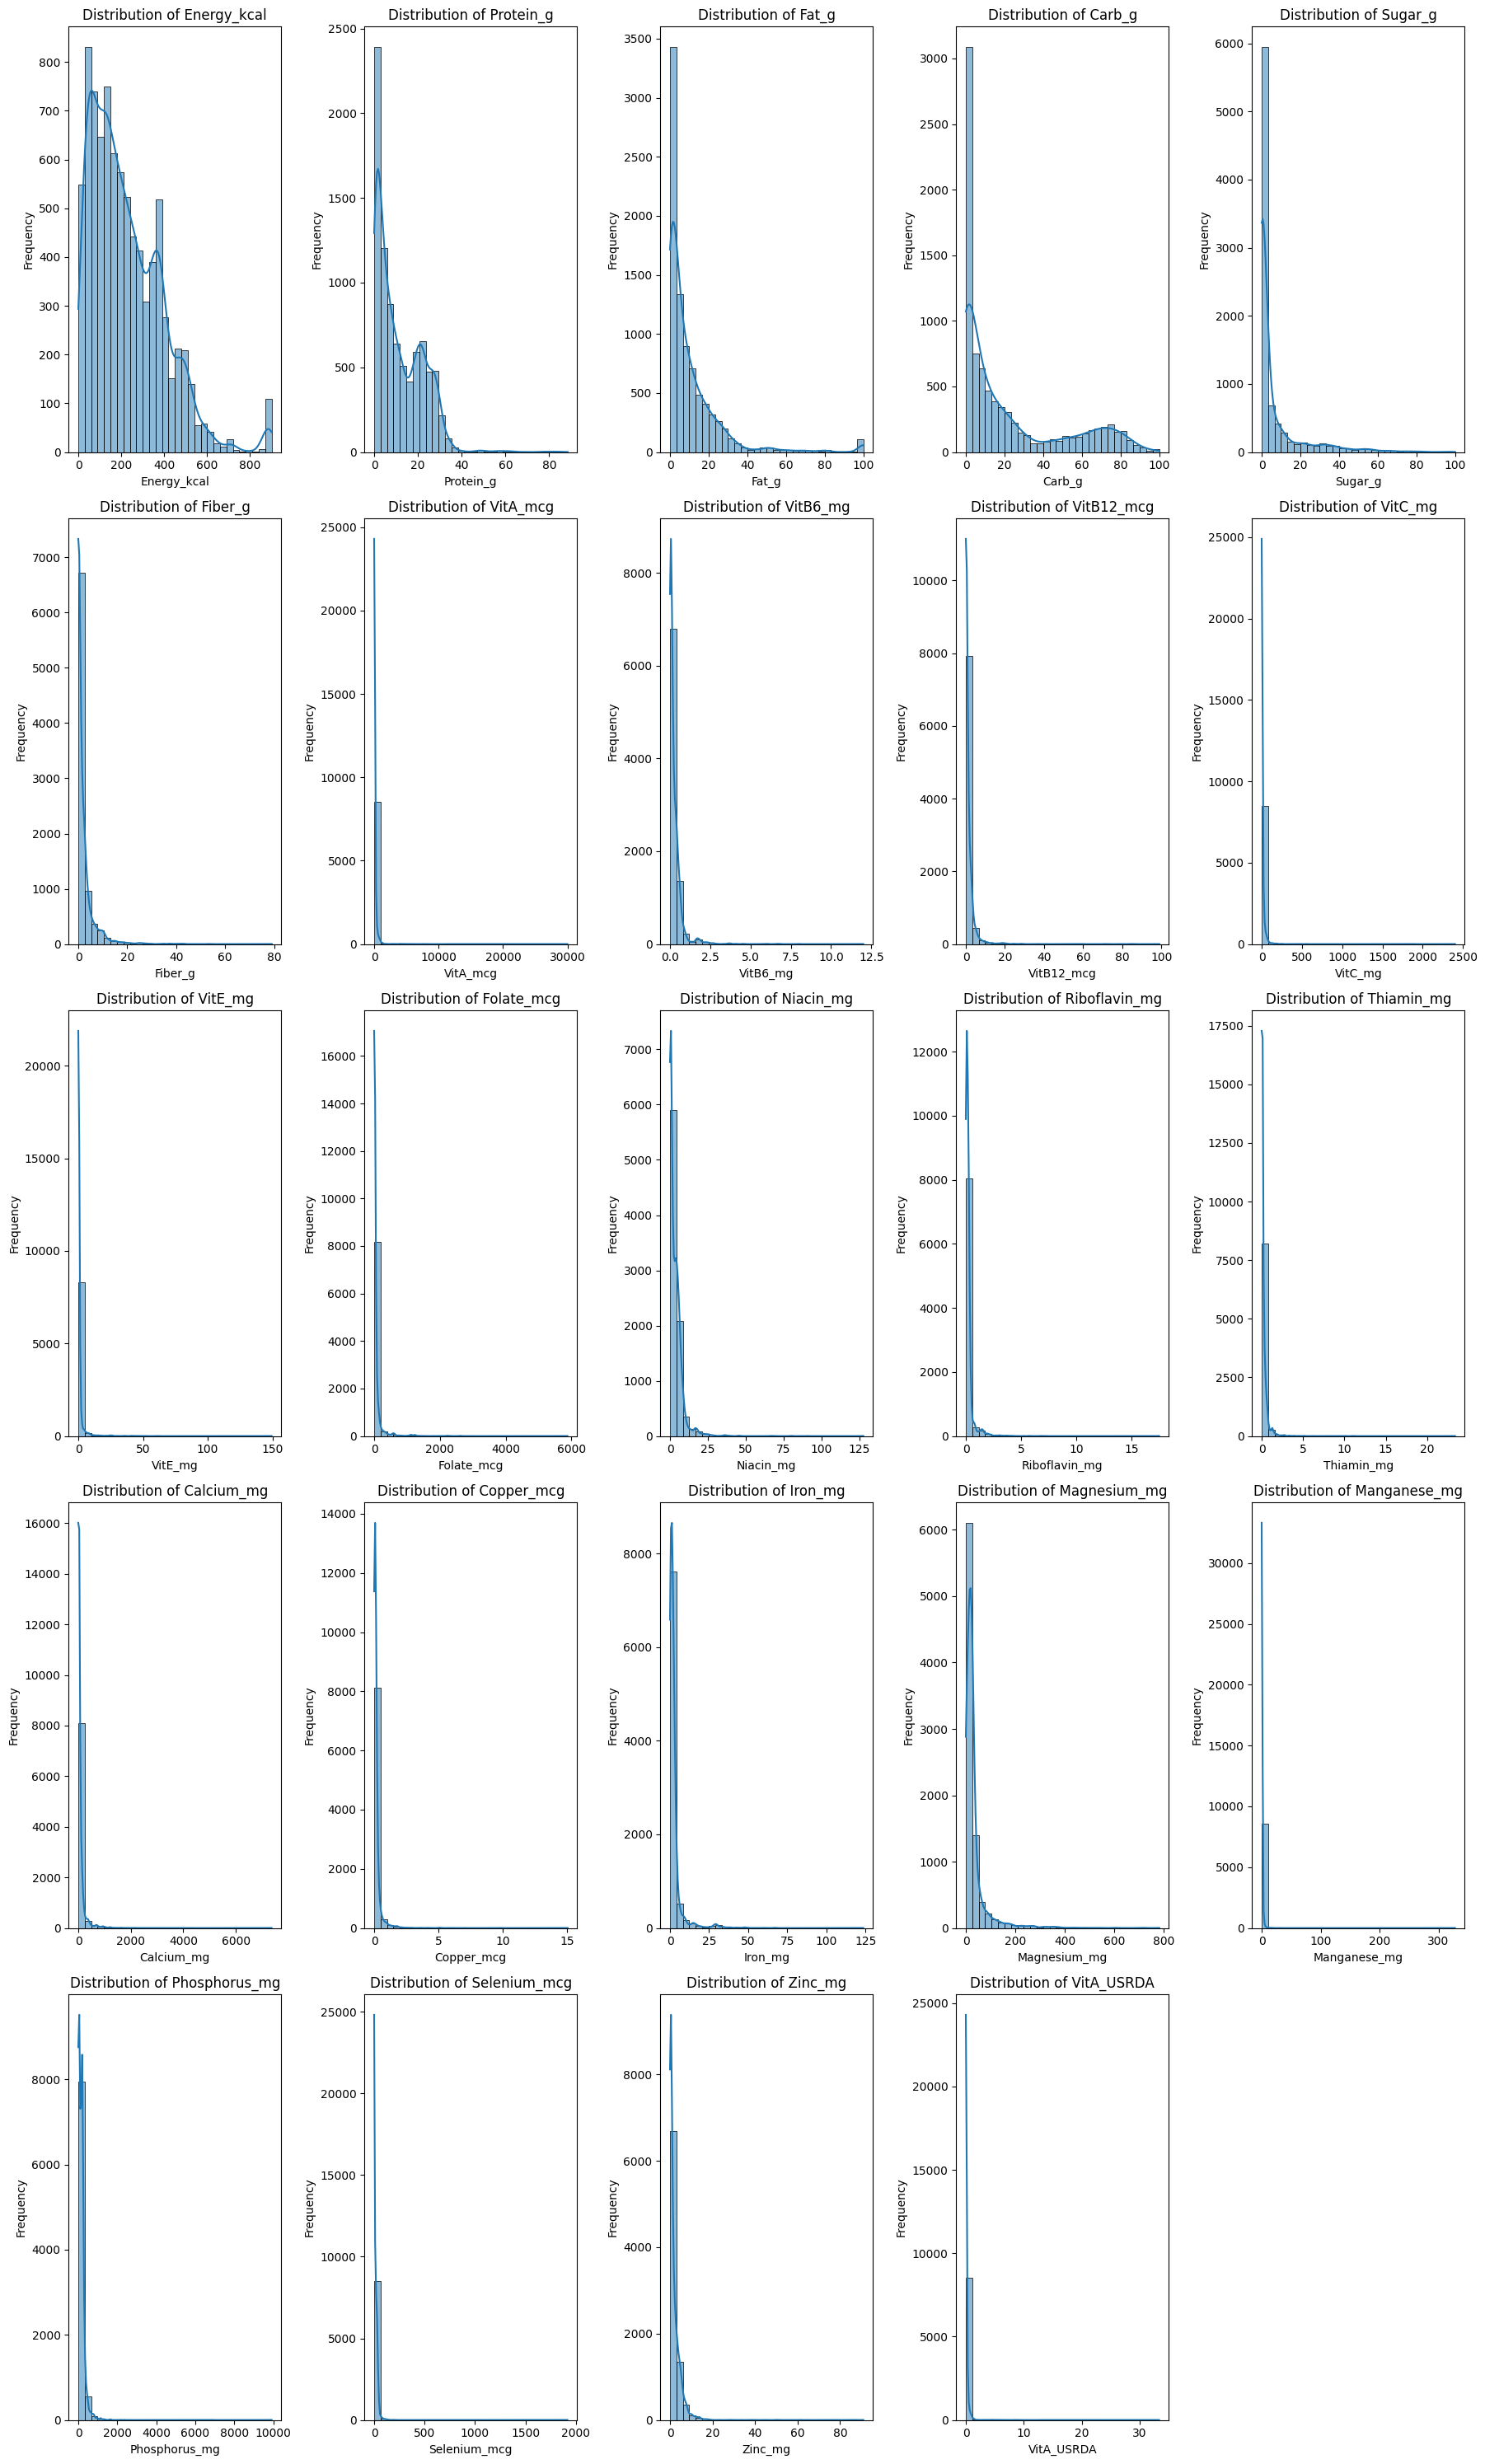

In [11]:
#TODO
num_features = df_numeric_reduced.columns
num_plots = len(num_features)
n_cols = 5
n_rows = -(-num_plots // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

for i, column in enumerate(num_features):
    sns.histplot(df_numeric_reduced[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [12]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array

df_numeric_reduced = df_numeric_reduced + 1
df_boxcoxed = pd.DataFrame(index=df_numeric_reduced.index)
for col in df_numeric_reduced.columns:
    df_boxcoxed[f"{col}_boxcoxed"] = boxcox(df_numeric_reduced[col])[0]



Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

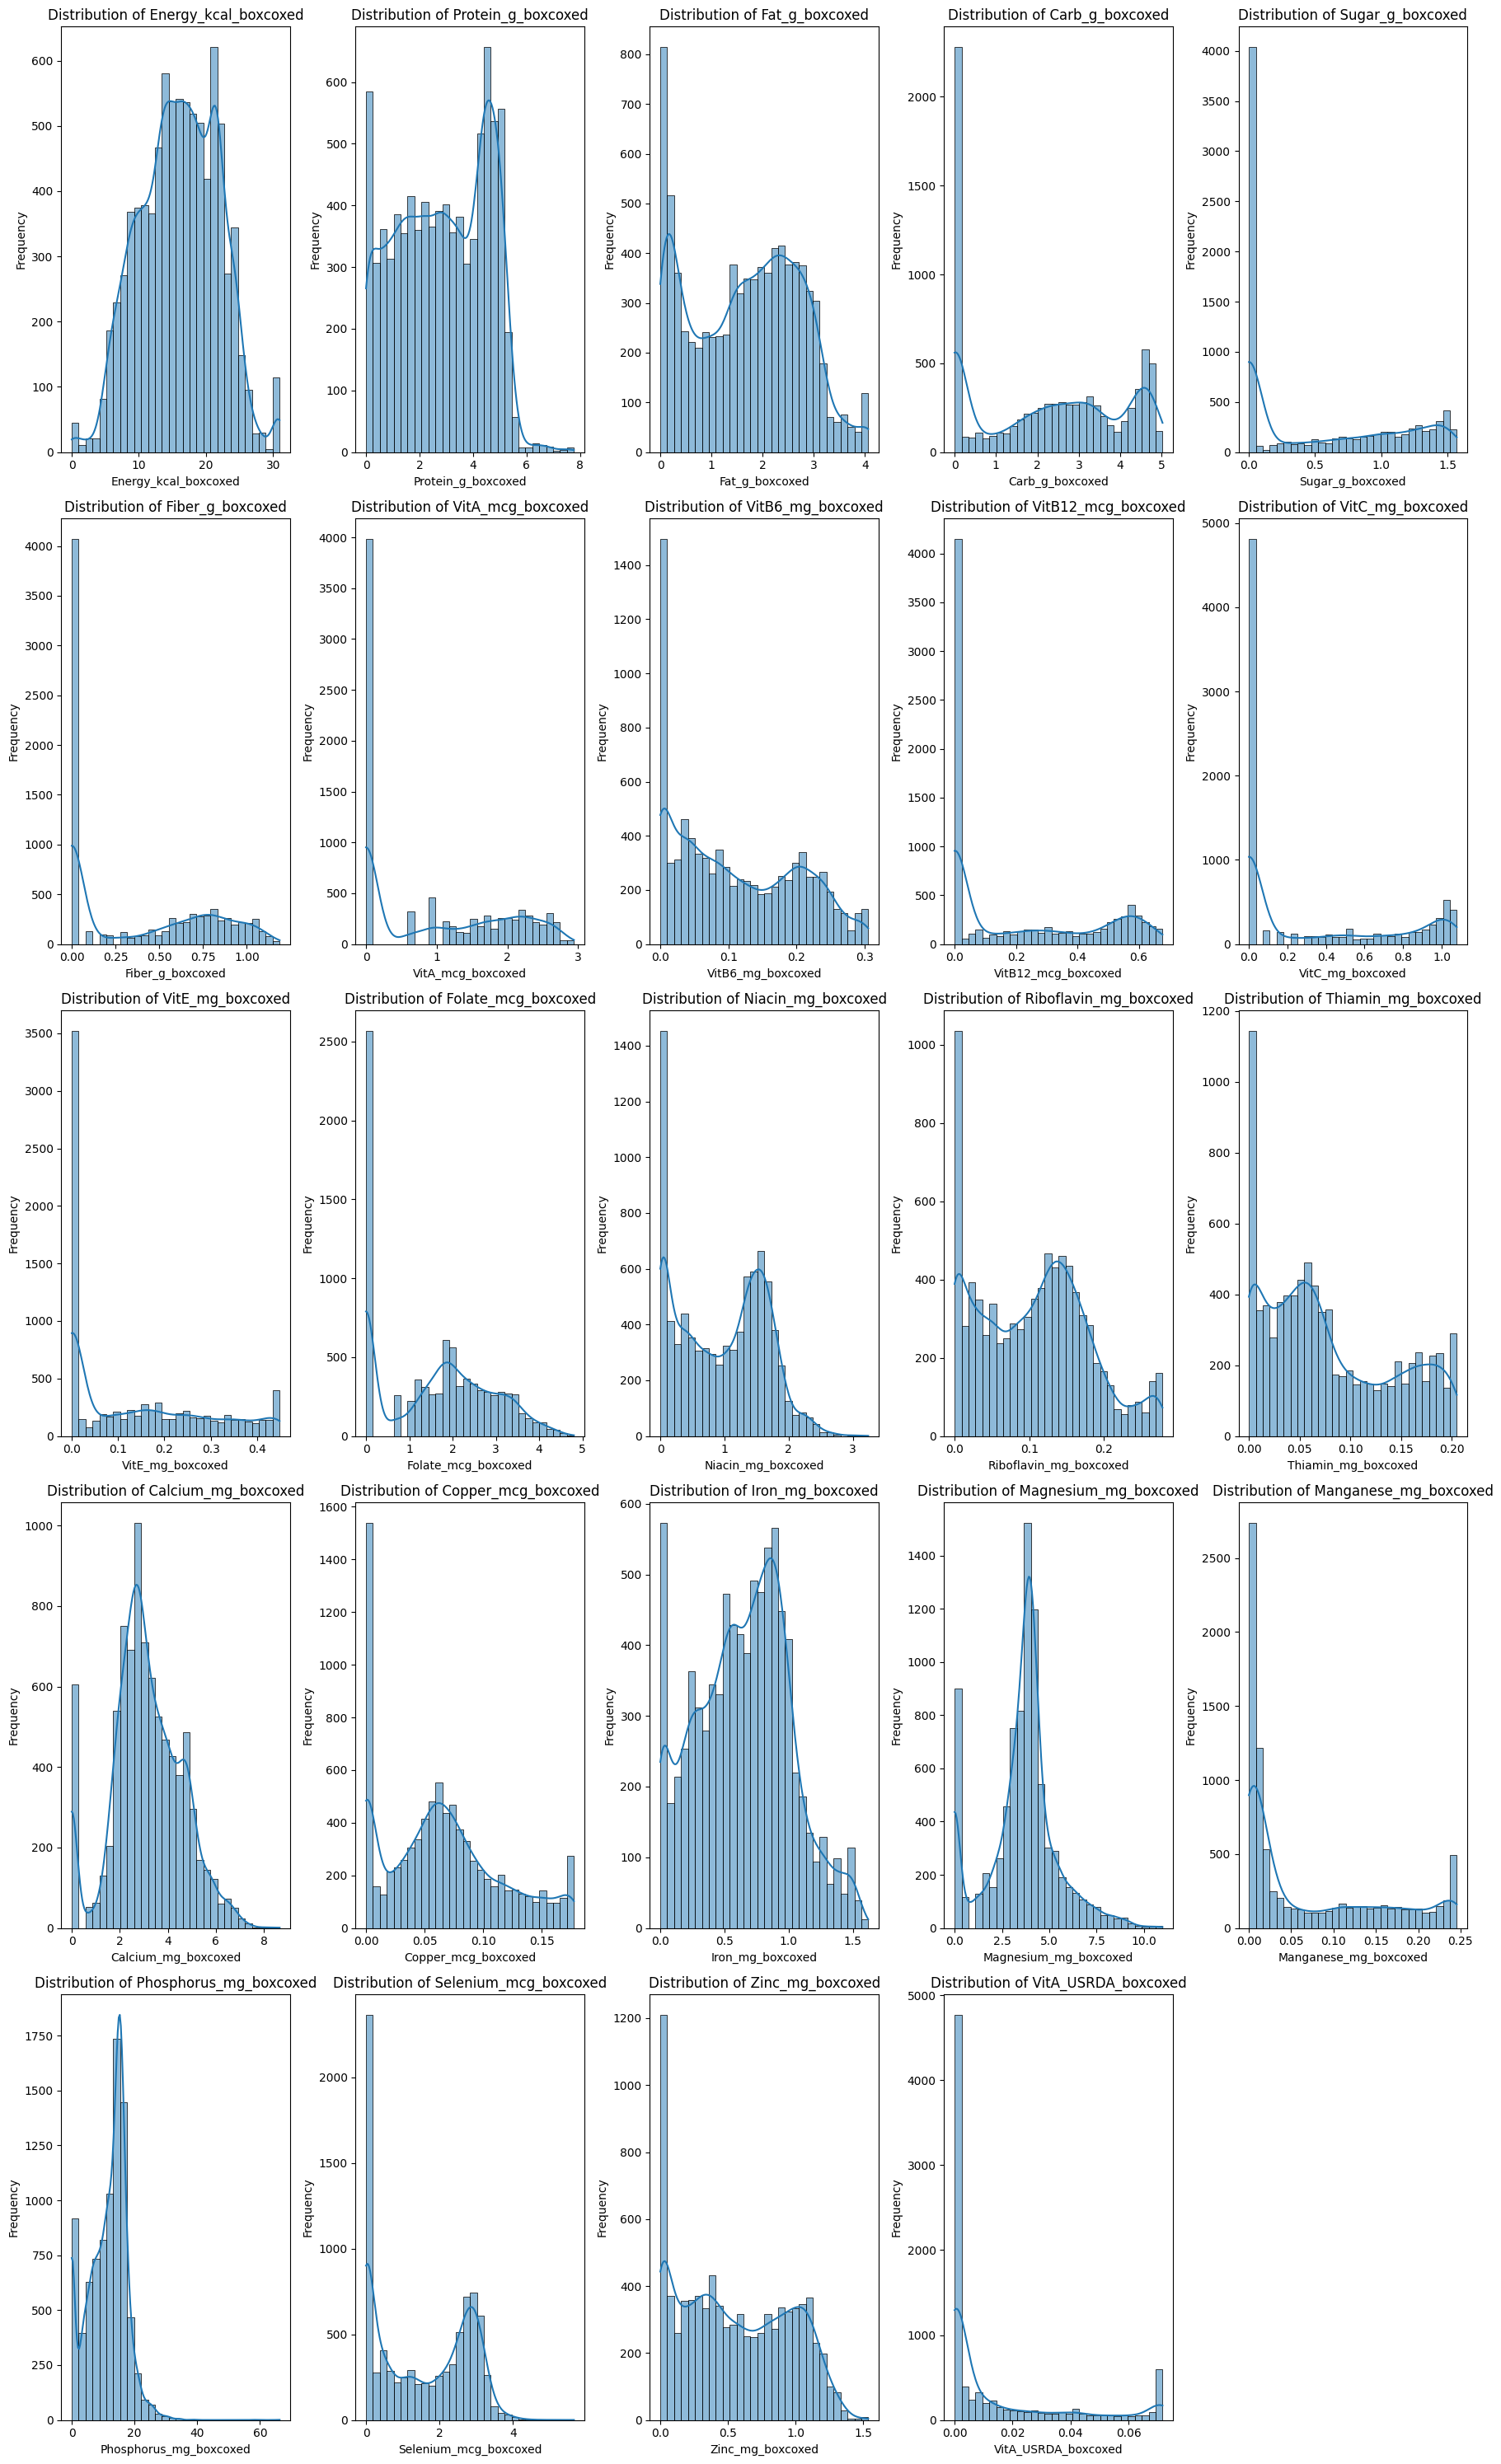

In [13]:
#TODO
num_features = df_boxcoxed.columns
num_plots = len(num_features)
n_cols = 5
n_rows = -(-num_plots // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

for i, column in enumerate(num_features):
    sns.histplot(df_boxcoxed[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [14]:
#TODO
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_boxcoxed), columns=df_boxcoxed.columns, index=df_boxcoxed.index)

print("mean:")
print(df_standardized.values.mean())
print("std:")
print(df_standardized.values.std())

mean:
8.931940478147774e-18
std:
0.9999999999999999


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [15]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        cov_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        self.components = eigenvectors[:, :self.n_components]

        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        X_centered = X - self.mean

        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components

Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [16]:
#TODO
X = df_standardized.values

pca = CustomPCA(n_components=X.shape[1])
pca.fit(X)
X_pca = pca.transform(X)

print("PCA transformed data:")
print(X_pca)

print("\nExplained variance ratio:")
print(pca.get_explained_variance_ratio())

print("\nPCA components (eigenvectors):")
print(pca.get_components())

PCA transformed data:
[[ 2.48771137  1.07678813  1.50237424 ...  0.05046431 -0.55406182
   0.8342452 ]
 [ 2.38685581  0.93363475  1.44552351 ...  0.06556777 -0.50064417
   0.83280224]
 [ 3.60488061  1.45746629  0.9201634  ...  0.03124695 -0.51662213
   0.93077528]
 ...
 [ 3.32443088 -0.53835679 -1.91810885 ... -0.36005449  0.01780552
   0.56634339]
 [-1.81189154  0.58487732  1.97122768 ... -0.82215474  0.17107143
  -0.36219915]
 [-1.24231293  1.00715899  2.33178385 ... -0.72543956  0.19632114
   0.4946611 ]]

Explained variance ratio:
[0.33204239 0.17596885 0.09797521 0.07441446 0.05310131 0.03746206
 0.03176998 0.02488993 0.02286856 0.01905277 0.01792331 0.01655206
 0.01384056 0.01287255 0.01031485 0.00936528 0.00858042 0.00842723
 0.0072938  0.00649644 0.00564829 0.00523174 0.00493773 0.00297023]

PCA components (eigenvectors):
[[-1.63973668e-01 -2.64856161e-02 -3.79393617e-01 -3.68612869e-01
  -2.16774504e-01  4.65495500e-02 -1.68166833e-01 -2.37568284e-01
   8.97646134e-02  5.00969

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


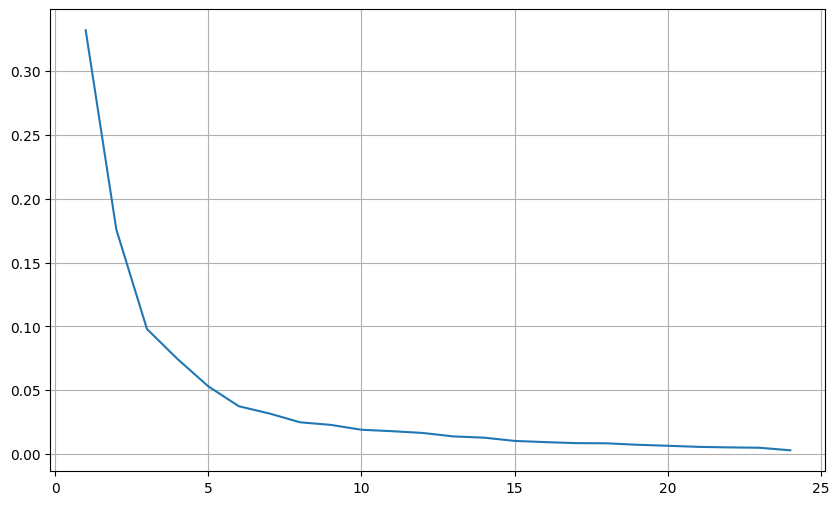

In [17]:
#TODO
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), pca.get_explained_variance_ratio())
plt.grid()
plt.show()

therefore we are going to pick 5 components

In [18]:
#TODO
#print the total explained variance ration for the first 5 components
n_components = 5
total_explained_variance_first_5 = np.sum(pca.get_explained_variance_ratio()[:n_components])
print(total_explained_variance_first_5)

0.7335022223288378


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [19]:
np.transpose(X_pca)[:5].shape

(5, 8618)

In [20]:
#TODO
df_pca = pd.DataFrame(np.transpose(np.transpose(X_pca)[:5]), columns=[f'PC{i+1}' for i in range(n_components)], index=df_standardized.index)

df_pca['FoodGroup'] = df_non_numeric['FoodGroup']
df_pca['ShortDescrip'] = df_non_numeric['ShortDescrip']
df_pca['Descrip'] = df_non_numeric['Descrip']

print(df_pca.head())

           PC1       PC2       PC3       PC4       PC5  \
ID                                                       
1001  2.487711  1.076788  1.502374 -4.511956 -2.861575   
1002  2.386856  0.933635  1.445524 -4.402484 -2.918216   
1003  3.604881  1.457466  0.920163 -4.928068 -2.868913   
1004 -2.135612  0.843682  2.270854 -2.593114 -1.178161   
1005 -1.726726  0.771613  2.258520 -2.845045 -1.583785   

                   FoodGroup              ShortDescrip  \
ID                                                       
1001  Dairy and Egg Products          BUTTER,WITH SALT   
1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
1004  Dairy and Egg Products               CHEESE,BLUE   
1005  Dairy and Egg Products              CHEESE,BRICK   

                         Descrip  
ID                                
1001              Butter, salted  
1002  Butter, whipped, with salt  
1003       Butter oil, anhydrous  
1004       

We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

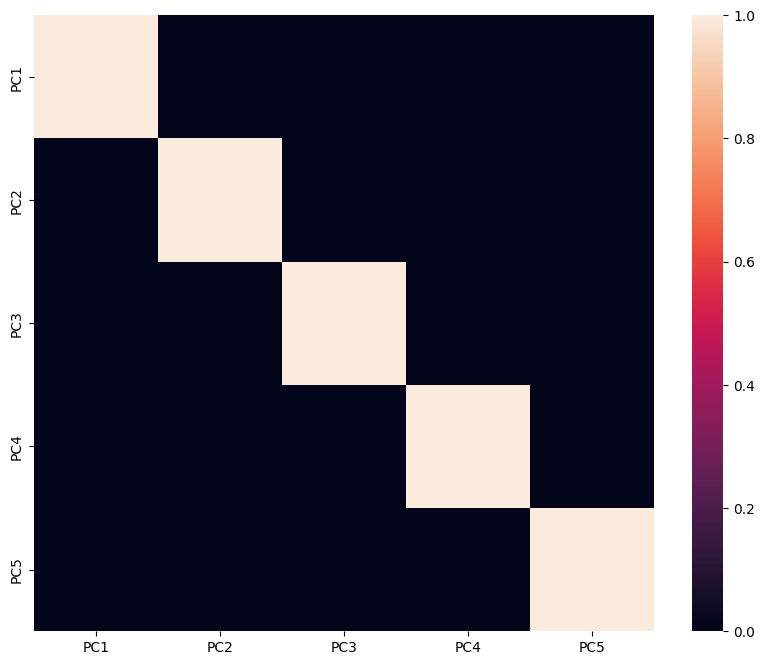

In [21]:
#TODO
correlation_matrix_pca = df_pca.drop(columns=['FoodGroup', "ShortDescrip", "Descrip"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pca)
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [22]:
# TODO get eigenvectors
components = pca.get_components()
df_eigenvectors = pd.DataFrame(components[:5], columns=df_standardized.columns, index=[f'PC{i+1}' for i in range(n_components)])
print(df_eigenvectors)

     Energy_kcal_boxcoxed  Protein_g_boxcoxed  Fat_g_boxcoxed  \
PC1             -0.163974           -0.026486       -0.379394   
PC2             -0.283407            0.203198       -0.038206   
PC3             -0.160215            0.127417       -0.239262   
PC4              0.031548           -0.399650       -0.253922   
PC5              0.073551           -0.293070       -0.130042   

     Carb_g_boxcoxed  Sugar_g_boxcoxed  Fiber_g_boxcoxed  VitA_mcg_boxcoxed  \
PC1        -0.368613         -0.216775          0.046550          -0.168167   
PC2         0.047265         -0.028340          0.144025           0.111893   
PC3        -0.418603         -0.299344          0.073802          -0.135539   
PC4        -0.098048          0.108010          0.098092           0.012458   
PC5        -0.280776          0.208266         -0.191888           0.437192   

     VitB6_mg_boxcoxed  VitB12_mcg_boxcoxed  VitC_mg_boxcoxed  ...  \
PC1          -0.237568             0.089765          0.050097  .

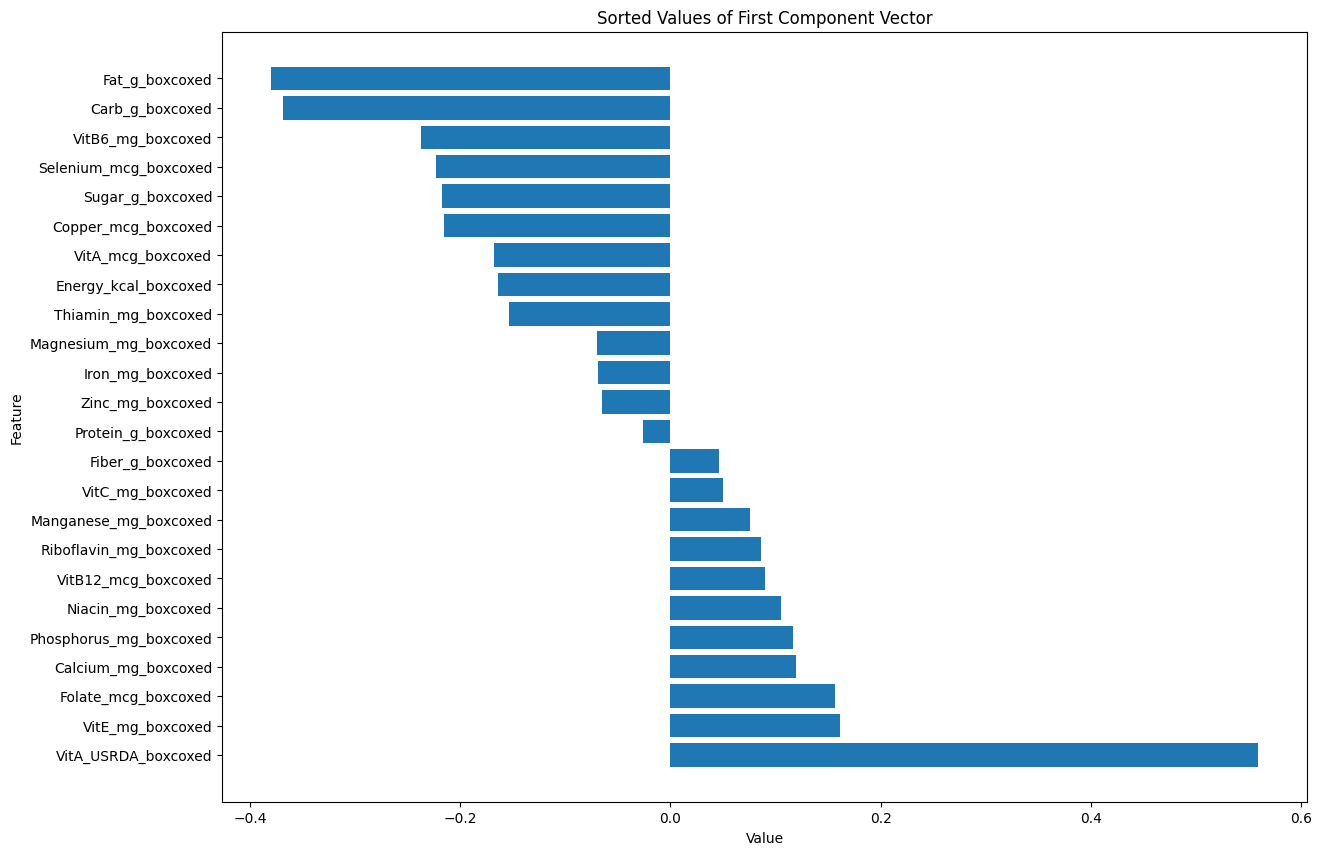

In [23]:
#TODO
plt.figure(figsize=(14, 10))
sorted_idx = np.argsort(df_eigenvectors.loc['PC1'])[::-1]
plt.barh(df_eigenvectors.columns[sorted_idx], df_eigenvectors.loc['PC1'][sorted_idx])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Sorted Values of First Component Vector')
plt.show()

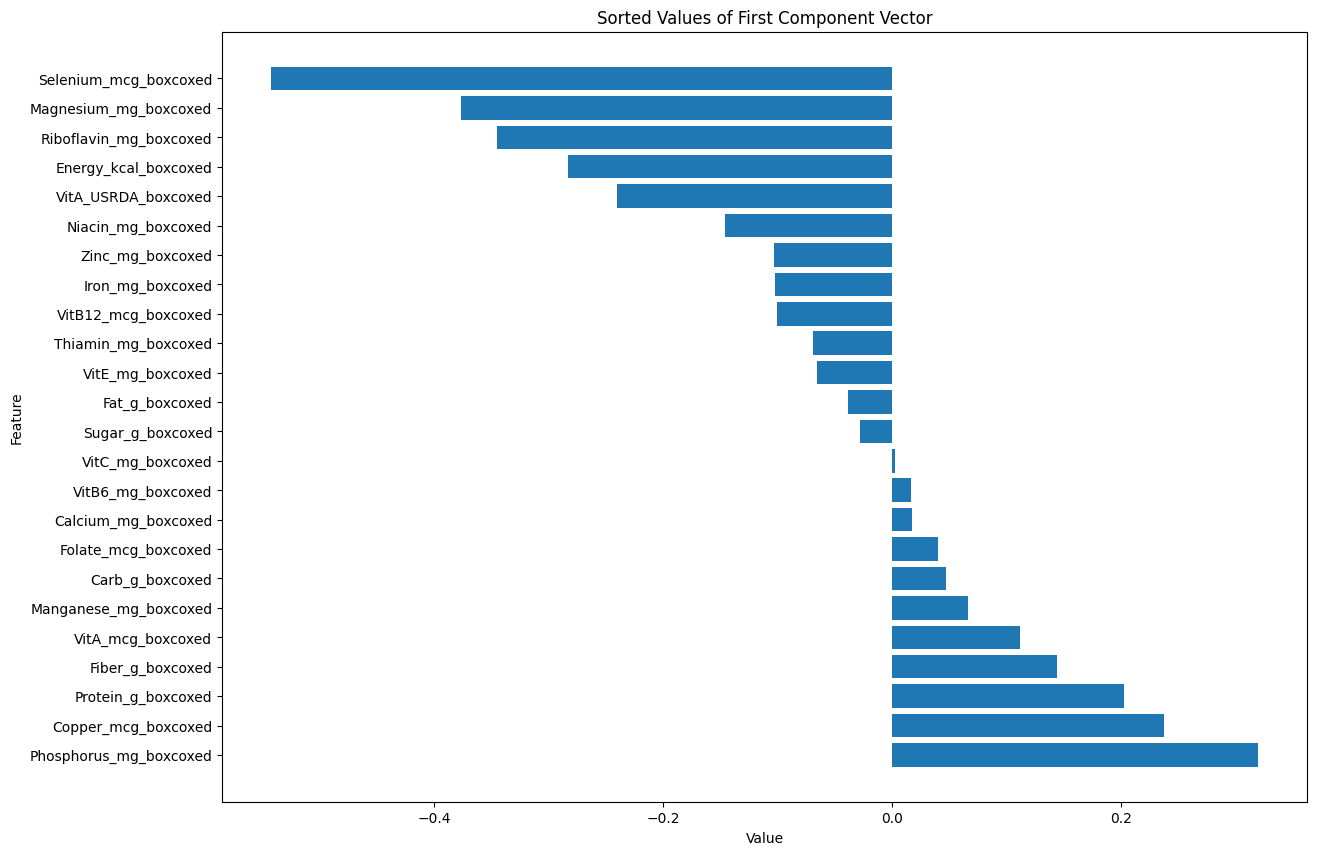

In [24]:
#TODO
plt.figure(figsize=(14, 10))
sorted_idx = np.argsort(df_eigenvectors.loc['PC2'])[::-1]
plt.barh(df_eigenvectors.columns[sorted_idx], df_eigenvectors.loc['PC2'][sorted_idx])
plt.xlabel('Value')
plt.ylabel('Feature')
plt.title('Sorted Values of First Component Vector')
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">In general, the closer a component is to one, the more positive its impact is, and they have a direct relationship, and if it is negative, it still has a high impact, but they have an opposite relationship with each other.

Therefore, according to the first main component, it is clear from the figure which columns have had a large positive impact and which columns have had a large but negative impact, and which columns have not had a special impact. In the same way, we can comment on the second main component.
</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

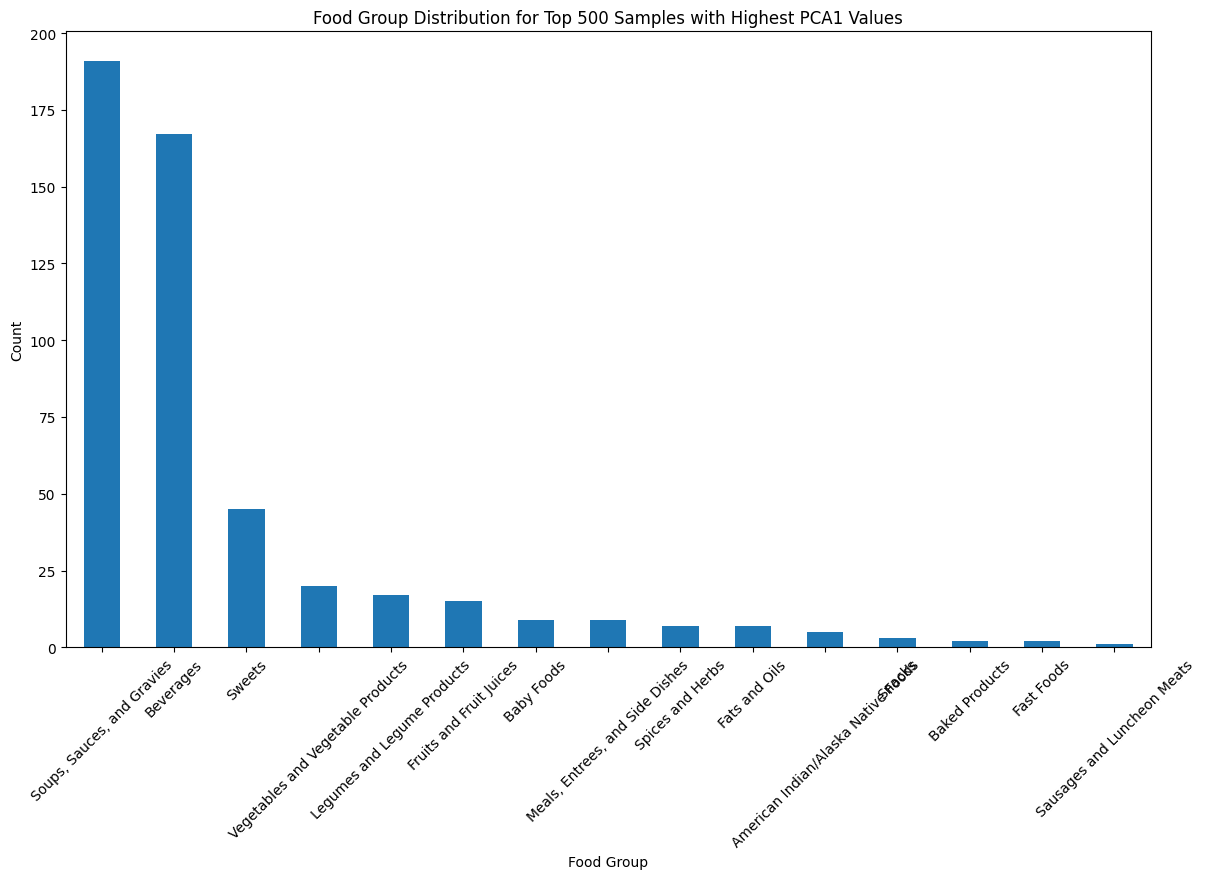

In [25]:
#TODO
plt.figure(figsize=(14, 8))
top_500_pca1 = df_pca.nlargest(500, 'PC1')
top_500_pca1['FoodGroup'].value_counts().plot(kind='bar')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.title('Food Group Distribution for Top 500 Samples with Highest PCA1 Values')
plt.xticks(rotation=45)
plt.show()

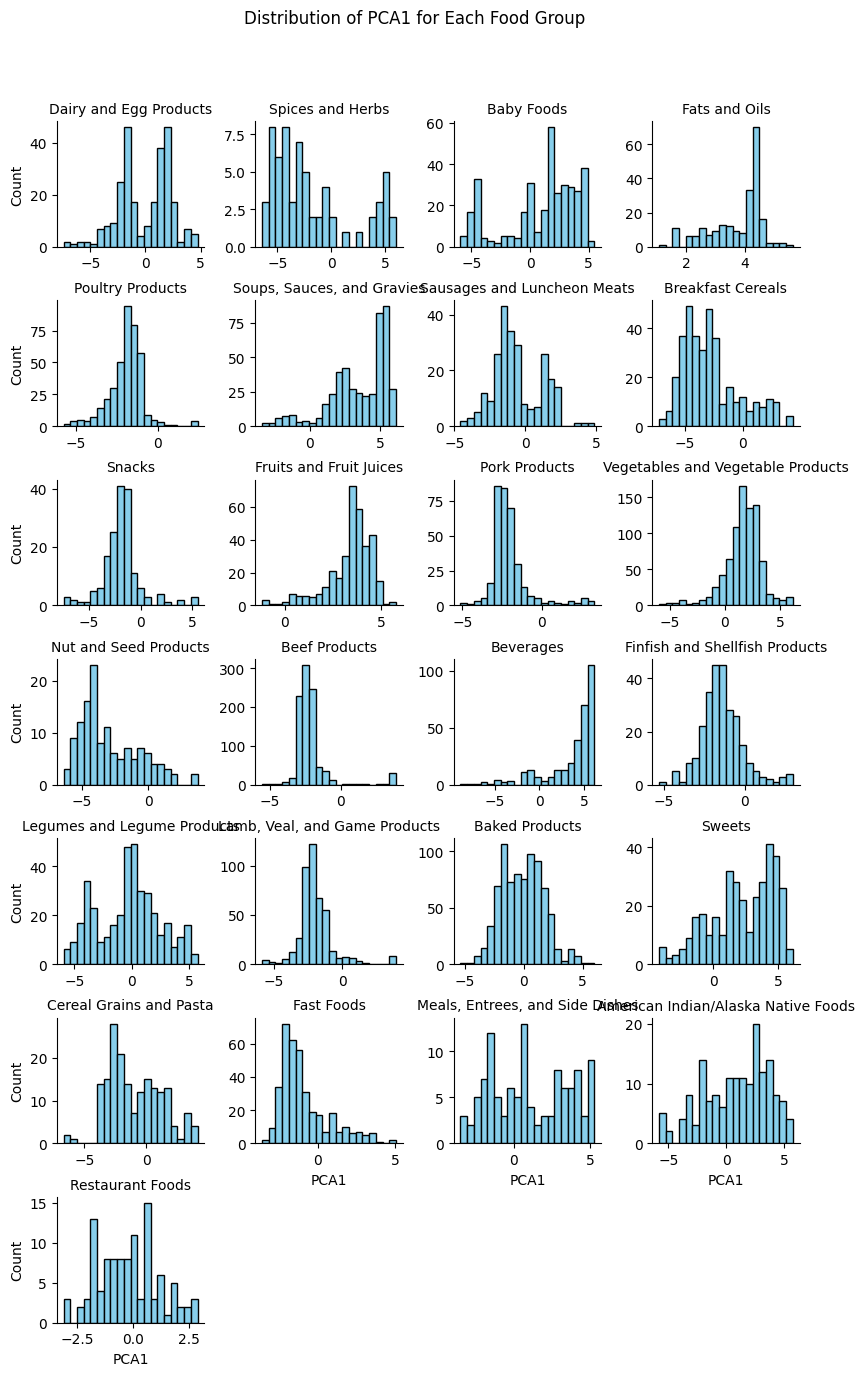

In [26]:
#TODO
g = sns.FacetGrid(df_pca, col='FoodGroup', col_wrap=4, height=2, sharex=False, sharey=False)
g.map(plt.hist, 'PC1', bins=20, color='skyblue', edgecolor='black')
g.set_titles("{col_name}")
g.set_axis_labels("PCA1", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of PCA1 for Each Food Group')
plt.show()

Do the same for pca2.

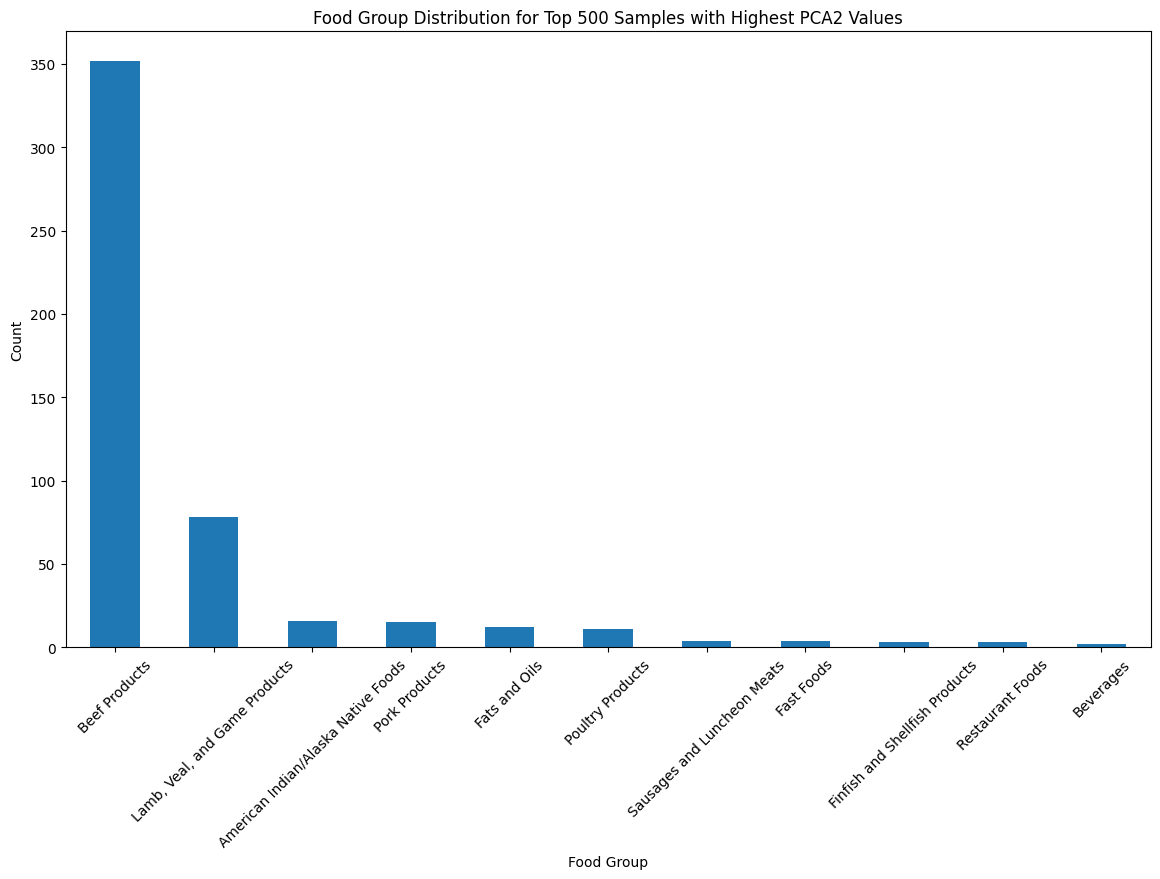

In [27]:
#TODO
plt.figure(figsize=(14, 8))
top_500_pca2 = df_pca.nlargest(500, 'PC2')
top_500_pca2['FoodGroup'].value_counts().plot(kind='bar')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.title('Food Group Distribution for Top 500 Samples with Highest PCA2 Values')
plt.xticks(rotation=45)
plt.show()

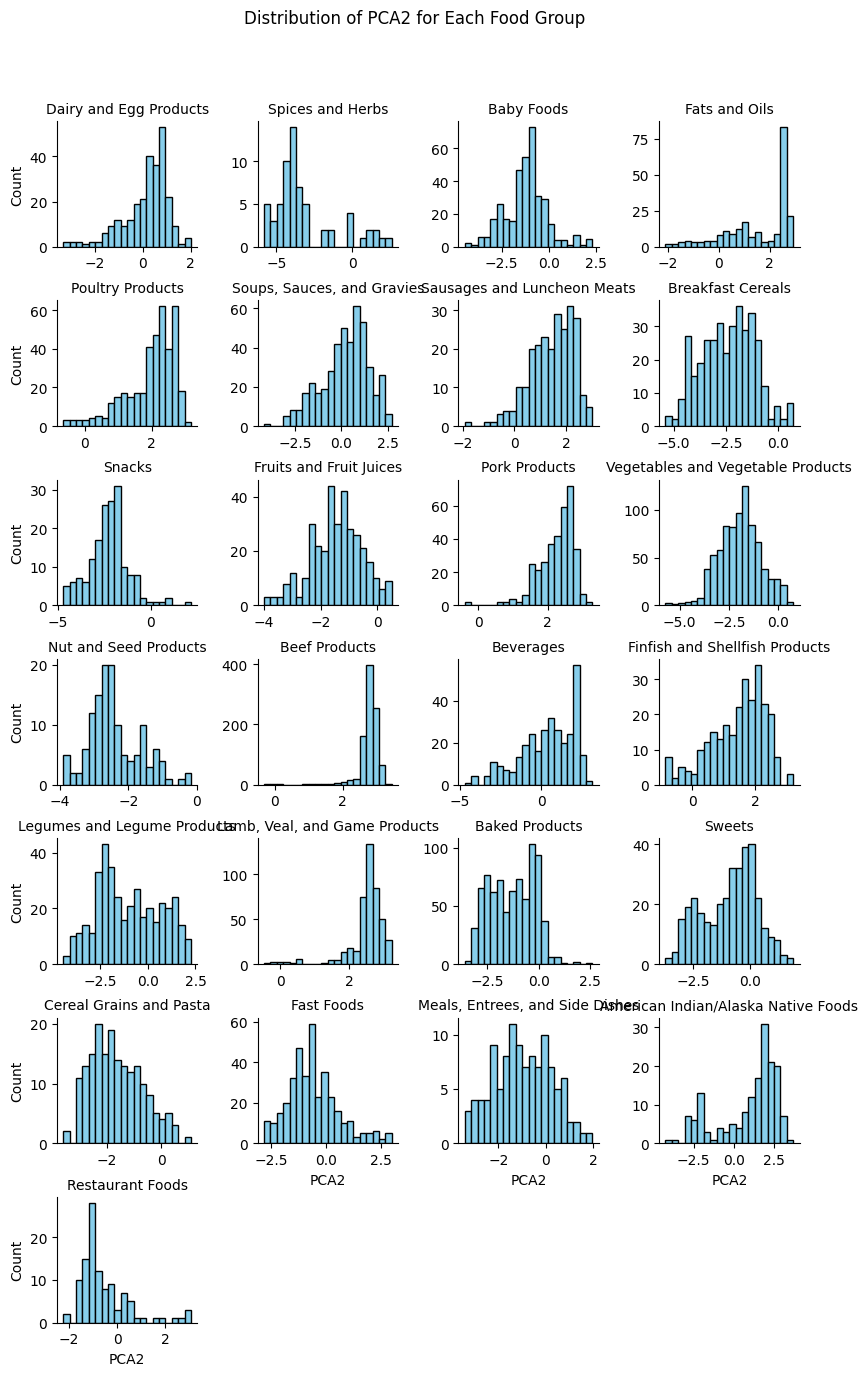

In [28]:
#TODO
g = sns.FacetGrid(df_pca, col='FoodGroup', col_wrap=4, height=2, sharex=False, sharey=False)
g.map(plt.hist, 'PC2', bins=20, color='skyblue', edgecolor='black')
g.set_titles("{col_name}")
g.set_axis_labels("PCA2", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of PCA2 for Each Food Group')
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


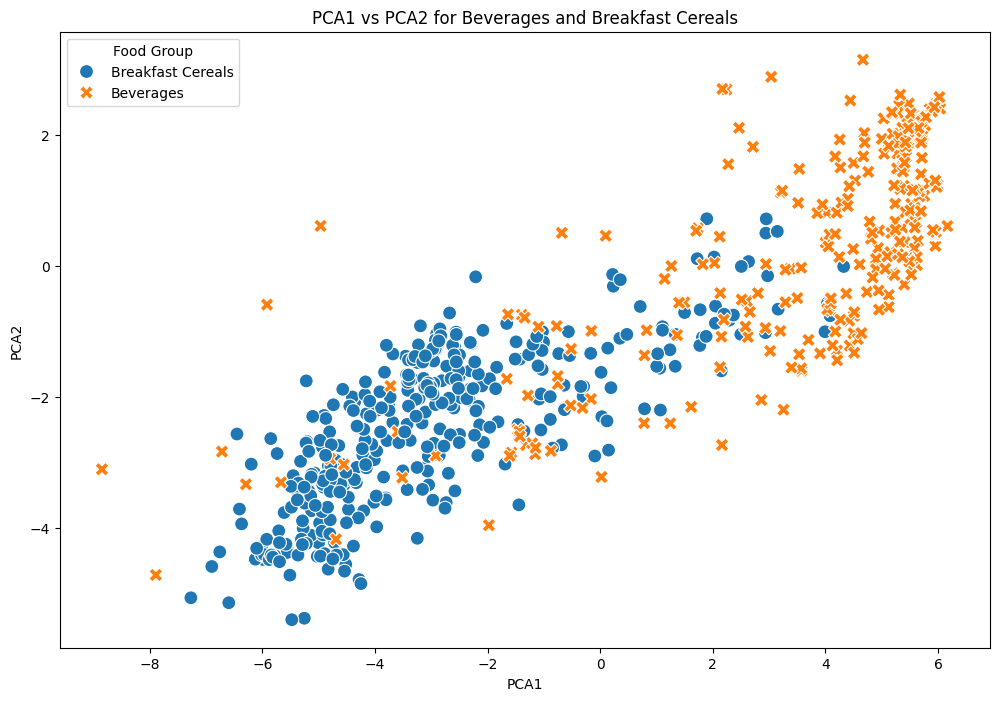

In [29]:
#TODO
filtered_df = df_pca[df_pca['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='PC1', y='PC2', hue='FoodGroup', style='FoodGroup', s=100)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2 for Beverages and Breakfast Cereals')
plt.legend(title='Food Group')
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">
The scatter plot of PCA1 versus PCA2 for Breakfast Cereals and Beverages shows a clear separation between the two food groups, indicating that PCA effectively differentiates them based on their nutritional profiles. Breakfast Cereals are clustered around negative values of PCA1, suggesting a more homogeneous nutritional content, while Beverages are spread mostly in the positive PCA1 region, reflecting greater variability. This separation implies that the primary nutritional features captured by PCA1 are key in distinguishing these groups, although some overlap exists, indicating edge cases where differentiation is less clear</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">
The scatter plot of PCA1 versus PCA2 visually demonstrates the separation between Breakfast Cereals and Beverages along PCA1, with Breakfast Cereals clustered around negative PCA1 values and Beverages around positive PCA1 values. This separation corresponds to the distribution of PCA1 for each food group, where Breakfast Cereals would have a distribution centered around negative values and Beverages around positive values. The scatter plot's spread along PCA1 reflects the variability within each group, indicating a more homogeneous profile for Breakfast Cereals and greater variability for Beverages, which is consistent with their respective PCA1 distribution widths</span>

